In [1]:
import scipy
import os
import warnings
import numpy as np
from model import DGN
from scipy.io import loadmat
import matplotlib.pyplot as plt
import torch.nn
import contextlib
import sys


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Arial', 'Liberation Serif']

#### 1. inspect

#### 2. data preprocessing

In [2]:
def normalize_matrix(connectivity_matrix):
    np.fill_diagonal(connectivity_matrix, 0)
    connectivity_matrix[np.logical_or(np.isinf(connectivity_matrix), np.isnan(connectivity_matrix))] = 0
    connectivity_matrix = connectivity_matrix.astype(float)
    
    return connectivity_matrix

In [3]:
connectivity_matrices_ad = []

for i in range(1, 42):
    mat = scipy.io.loadmat(f'data_ad_lmci_L/data_ad_lmci_L/AD_LH/subject{i}.mat')
    connectivity_matrix = mat['A'][:, :, :]
    connectivity_matrix = [normalize_matrix(mat) for mat in connectivity_matrix]
    connectivity_matrices_ad.append(connectivity_matrix)

connectivity_matrices_ad = np.stack(connectivity_matrices_ad)

connectivity_matrices_lmci = []

for i in range(42, 78):
    mat = scipy.io.loadmat(f'data_ad_lmci_L/data_ad_lmci_L/LMCI_LH/subject{i}.mat')
    connectivity_matrix = mat['A'][:, :, :]
    connectivity_matrix = [normalize_matrix(mat) for mat in connectivity_matrix]
    connectivity_matrices_lmci.append(connectivity_matrix)

connectivity_matrices_lmci = np.stack(connectivity_matrices_lmci)


In [4]:
warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
Dataset = "E" 

#Number of simulated subjects (overwriten if Dataset = "E") 
N_Subjects = 41

#Number of nodes for simulated brain networks (overwriten if Dataset = "E") 
N_Nodes = 35

#Number of brain views (overwriten if Dataset = "E")
N_views = 4

#Number of training epochs
N_max_epochs = 500

#Apply early stopping True/False
early_stop =  True

#Random subset size for SNL function  
random_sample_size = 10

#Number of cross validation folds
n_folds = 5

#Learning Rate for Adam optimizer
lr = 0.002

#Name of the model
model_name = "ad_l_RC_loss_only"

CONV1 = CONV2 = CONV3 = 8

lambda_r = 200
lambda_b = 0
patience = 3
convergence_threshold = 0.01

#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#
#                 Below is not to be modified manually                       #
#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#

import helper

if Dataset.lower() not in ["e", "E", "s", "S"]:
    raise ValueError("Dataset options are E or S.")
    
if (Dataset.lower() == "e"):
    X = connectivity_matrices_ad
    N_Subjects = X.shape[0]
    N_Nodes = X.shape[1]
    N_views = X.shape[3]
else:
    X = helper.create_better_simulated(N_Subjects, N_Nodes) if N_views == 4 else helper.simulate_dataset(N_Subjects, N_Nodes, N_views)


CONFIG = {
        "X": X,
        "N_ROIs":  X.shape[1],
        "N_views":  X.shape[3],
        "N_max_epochs": N_max_epochs,
        "n_folds": n_folds,
        "random_sample_size": random_sample_size,
        "early_stop": early_stop,
        "model_name": model_name
    }

MODEL_PARAMS = {
        "N_ROIs": N_Nodes,
        "learning_rate" : lr,
        "n_attr": X.shape[3],
        "Linear1" : {"in": N_views, "out": CONV1},
        "conv1": {"in" : 1, "out": CONV1},
        
        "Linear2" : {"in": N_views, "out": CONV1*CONV2},
        "conv2": {"in" : CONV1, "out": CONV2},
        
        "Linear3" : {"in": N_views, "out": CONV2*CONV3},
        "conv3": {"in" : CONV2, "out": CONV3},
        "lambda_r" : lambda_r,
        "lambda_b" : lambda_b,
        "patience" : patience,
        "convergence_threshold" : convergence_threshold,
    }

lambda r 200.0 lambda b 0.0
********* FOLD 0 *********
Epoch: 0  |  cbt loss : 54.87 | reservoir loss : 0.0896 | bio loss : 0.00000 | total loss: 58.45 | median cbt mc 9.26 | Time Elapsed: 5.61 | 
Epoch: 10  |  cbt loss : 27.57 | reservoir loss : 0.0885 | bio loss : 0.00000 | total loss: 27.57 | median cbt mc 9.27 | Time Elapsed: 10.16 | 
Epoch: 20  |  cbt loss : 17.62 | reservoir loss : 0.0883 | bio loss : 0.00000 | total loss: 17.62 | median cbt mc 9.27 | Time Elapsed: 10.74 | 
Epoch: 30  |  cbt loss : 13.92 | reservoir loss : 0.0882 | bio loss : 0.00000 | total loss: 13.92 | median cbt mc 10.23 | Time Elapsed: 10.76 | 
Epoch: 40  |  cbt loss : 12.50 | reservoir loss : 0.0881 | bio loss : 0.00000 | total loss: 12.50 | median cbt mc 10.33 | Time Elapsed: 12.13 | 
CBT loss has converged.
Epoch: 50  |  cbt loss : 12.51 | reservoir loss : 0.0881 | bio loss : 0.00000 | total loss: 12.51 | median cbt mc 10.25 | Time Elapsed: 32.05 | 
CBT loss has converged.
Epoch: 60  |  cbt loss : 12.51 |

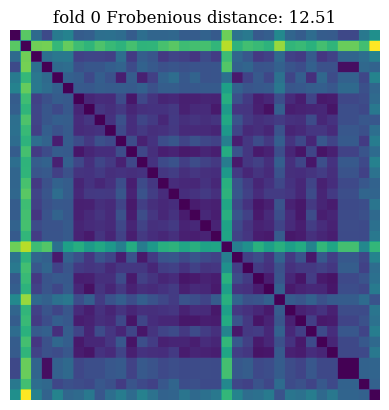

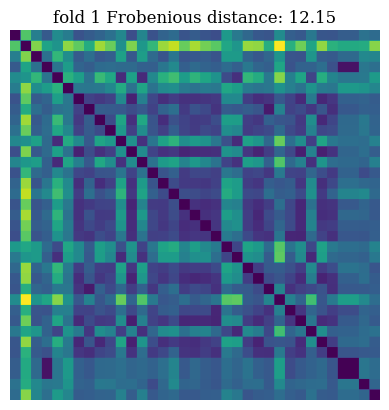

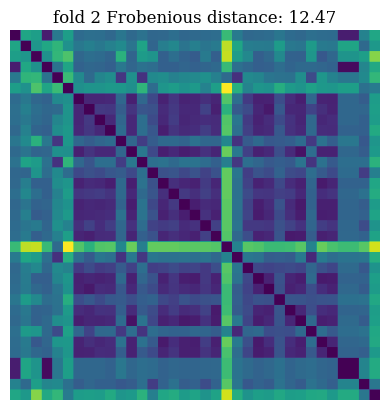

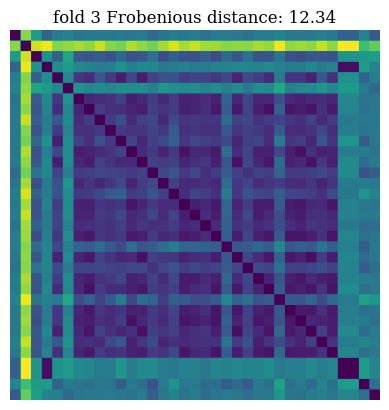

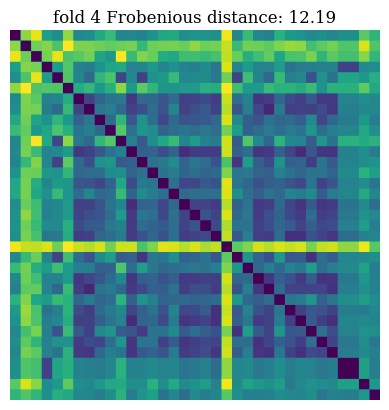

In [6]:
np.random.seed(35813)
torch.manual_seed(35813)
models = DGN.train_model(
                CONFIG["X"],
                model_params=MODEL_PARAMS,
                n_max_epochs=CONFIG["N_max_epochs"],
                n_folds=CONFIG["n_folds"],
                random_sample_size=CONFIG["random_sample_size"],
                early_stop=CONFIG["early_stop"],
                model_name=CONFIG["model_name"])

In [7]:
Dataset = "E" 

#Number of simulated subjects (overwriten if Dataset = "E") 
N_Subjects = 36

#Number of nodes for simulated brain networks (overwriten if Dataset = "E") 
N_Nodes = 35

#Number of brain views (overwriten if Dataset = "E")
N_views = 4

#Number of training epochs
N_max_epochs = 500

#Apply early stopping True/False
early_stop =  True

#Random subset size for SNL function  
random_sample_size = 10

#Number of cross validation folds
n_folds = 5

#Learning Rate for Adam optimizer
lr = 0.001

#Name of the model
model_name = "lmci_l_rc_loss_only"

CONV1 = CONV2 = CONV3 = 8

lambda_r = 200
lambda_b = 0
patience = 3
convergence_threshold = 0.01

#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#
#                 Below is not to be modified manually                       #
#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#

import helper

if Dataset.lower() not in ["e", "E", "s", "S"]:
    raise ValueError("Dataset options are E or S.")
    
if (Dataset.lower() == "e"):
    X = connectivity_matrices_lmci
    N_Subjects = X.shape[0]
    N_Nodes = X.shape[1]
    N_views = X.shape[3]
else:
    X = helper.create_better_simulated(N_Subjects, N_Nodes) if N_views == 4 else helper.simulate_dataset(N_Subjects, N_Nodes, N_views)


CONFIG = {
        "X": X,
        "N_ROIs":  X.shape[1],
        "N_views":  X.shape[3],
        "N_max_epochs": N_max_epochs,
        "n_folds": n_folds,
        "random_sample_size": random_sample_size,
        "early_stop": early_stop,
        "model_name": model_name
    }

MODEL_PARAMS = {
        "N_ROIs": N_Nodes,
        "learning_rate" : lr,
        "n_attr": X.shape[3],
        "Linear1" : {"in": N_views, "out": CONV1},
        "conv1": {"in" : 1, "out": CONV1},
        
        "Linear2" : {"in": N_views, "out": CONV1*CONV2},
        "conv2": {"in" : CONV1, "out": CONV2},
        
        "Linear3" : {"in": N_views, "out": CONV2*CONV3},
        "conv3": {"in" : CONV2, "out": CONV3},
        "lambda_r" : lambda_r,
        "lambda_b" : lambda_b,
        "patience" : patience,
        "convergence_threshold" : convergence_threshold,
    }

lambda r 200.0 lambda b 0.0
********* FOLD 0 *********
Epoch: 0  |  cbt loss : 60.54 | reservoir loss : 0.0897 | bio loss : 0.00000 | total loss: 64.12 | median cbt mc 9.26 | Time Elapsed: 10.62 | 
Epoch: 10  |  cbt loss : 40.68 | reservoir loss : 0.0892 | bio loss : 0.00000 | total loss: 40.68 | median cbt mc 9.26 | Time Elapsed: 30.77 | 
Epoch: 20  |  cbt loss : 29.79 | reservoir loss : 0.0890 | bio loss : 0.00000 | total loss: 29.79 | median cbt mc 9.27 | Time Elapsed: 30.18 | 
Epoch: 30  |  cbt loss : 22.61 | reservoir loss : 0.0890 | bio loss : 0.00000 | total loss: 22.61 | median cbt mc 9.28 | Time Elapsed: 29.81 | 
Epoch: 40  |  cbt loss : 18.54 | reservoir loss : 0.0889 | bio loss : 0.00000 | total loss: 18.54 | median cbt mc 9.29 | Time Elapsed: 32.58 | 
Epoch: 50  |  cbt loss : 15.92 | reservoir loss : 0.0889 | bio loss : 0.00000 | total loss: 15.92 | median cbt mc 10.24 | Time Elapsed: 42.17 | 
Epoch: 60  |  cbt loss : 14.44 | reservoir loss : 0.0889 | bio loss : 0.00000 | t

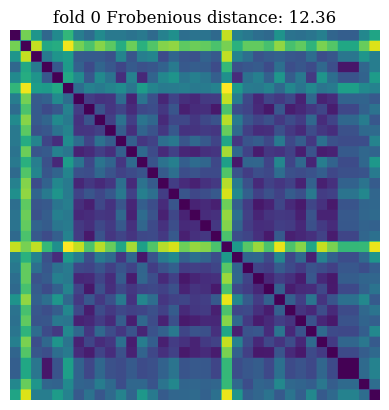

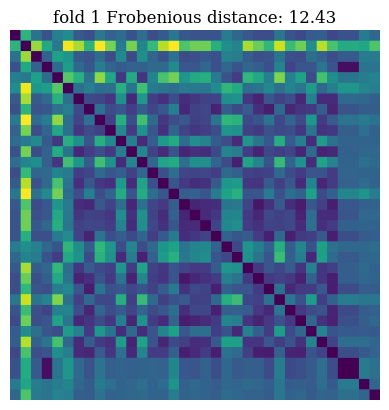

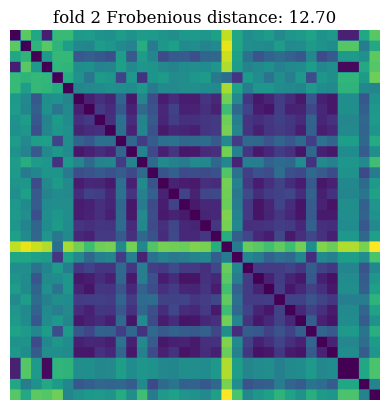

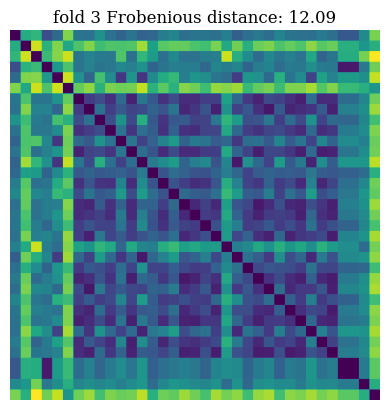

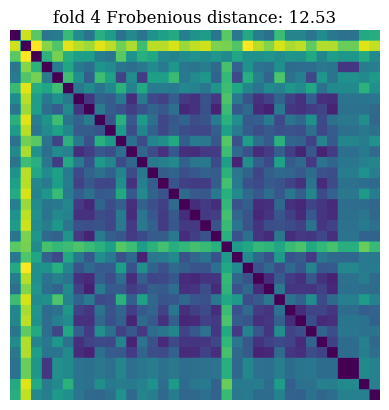

In [8]:
np.random.seed(35813)
torch.manual_seed(35813)
models = DGN.train_model(
                CONFIG["X"],
                model_params=MODEL_PARAMS,
                n_max_epochs=CONFIG["N_max_epochs"],
                n_folds=CONFIG["n_folds"],
                random_sample_size=CONFIG["random_sample_size"],
                early_stop=CONFIG["early_stop"],
                model_name=CONFIG["model_name"])

### rerun

In [10]:
Dataset = "E" 

#Number of simulated subjects (overwriten if Dataset = "E") 
N_Subjects = 36

#Number of nodes for simulated brain networks (overwriten if Dataset = "E") 
N_Nodes = 35

#Number of brain views (overwriten if Dataset = "E")
N_views = 4

#Number of training epochs
N_max_epochs = 500

#Apply early stopping True/False
early_stop =  True

#Random subset size for SNL function  
random_sample_size = 10

#Number of cross validation folds
n_folds = 5

#Learning Rate for Adam optimizer
lr = 0.001

#Name of the model
model_name = "lmci_l_rc_loss_only_rerun0406"

CONV1 = CONV2 = CONV3 = 8

lambda_r = 200
lambda_b = 0
patience = 6
convergence_threshold = 0.001

#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#
#                 Below is not to be modified manually                       #
#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#

import helper

if Dataset.lower() not in ["e", "E", "s", "S"]:
    raise ValueError("Dataset options are E or S.")
    
if (Dataset.lower() == "e"):
    X = connectivity_matrices_lmci
    N_Subjects = X.shape[0]
    N_Nodes = X.shape[1]
    N_views = X.shape[3]
else:
    X = helper.create_better_simulated(N_Subjects, N_Nodes) if N_views == 4 else helper.simulate_dataset(N_Subjects, N_Nodes, N_views)


CONFIG = {
        "X": X,
        "N_ROIs":  X.shape[1],
        "N_views":  X.shape[3],
        "N_max_epochs": N_max_epochs,
        "n_folds": n_folds,
        "random_sample_size": random_sample_size,
        "early_stop": early_stop,
        "model_name": model_name
    }

MODEL_PARAMS = {
        "N_ROIs": N_Nodes,
        "learning_rate" : lr,
        "n_attr": X.shape[3],
        "Linear1" : {"in": N_views, "out": CONV1},
        "conv1": {"in" : 1, "out": CONV1},
        
        "Linear2" : {"in": N_views, "out": CONV1*CONV2},
        "conv2": {"in" : CONV1, "out": CONV2},
        
        "Linear3" : {"in": N_views, "out": CONV2*CONV3},
        "conv3": {"in" : CONV2, "out": CONV3},
        "lambda_r" : lambda_r,
        "lambda_b" : lambda_b,
        "patience" : patience,
        "convergence_threshold" : convergence_threshold,
    }

lambda r 200.0 lambda b 0.0
********* FOLD 0 *********
Epoch: 0  |  cbt loss : 60.54 | reservoir loss : 0.0897 | bio loss : 0.00000 | total loss: 64.12 | median cbt mc 9.26 | Time Elapsed: 2.96 | 
Epoch: 10  |  cbt loss : 40.68 | reservoir loss : 0.0892 | bio loss : 0.00000 | total loss: 40.68 | median cbt mc 9.26 | Time Elapsed: 11.34 | 
Epoch: 20  |  cbt loss : 29.79 | reservoir loss : 0.0890 | bio loss : 0.00000 | total loss: 29.79 | median cbt mc 9.27 | Time Elapsed: 15.76 | 
Epoch: 30  |  cbt loss : 22.60 | reservoir loss : 0.0890 | bio loss : 0.00000 | total loss: 22.60 | median cbt mc 9.28 | Time Elapsed: 8.00 | 
Epoch: 40  |  cbt loss : 18.54 | reservoir loss : 0.0889 | bio loss : 0.00000 | total loss: 18.54 | median cbt mc 9.29 | Time Elapsed: 26.91 | 
Epoch: 50  |  cbt loss : 15.92 | reservoir loss : 0.0889 | bio loss : 0.00000 | total loss: 15.92 | median cbt mc 10.24 | Time Elapsed: 40.04 | 
Epoch: 60  |  cbt loss : 14.44 | reservoir loss : 0.0889 | bio loss : 0.00000 | tot

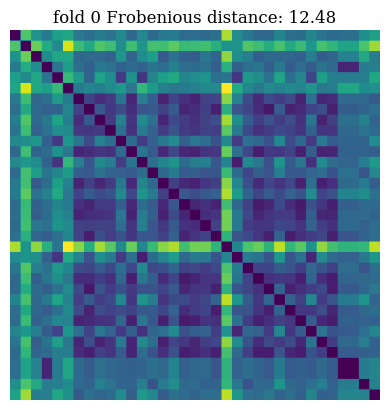

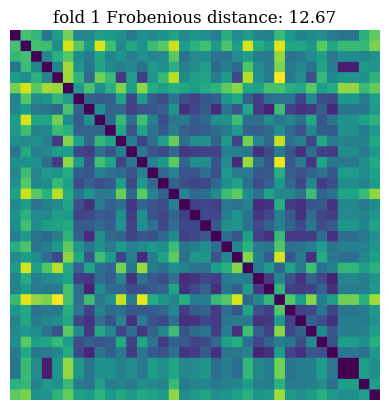

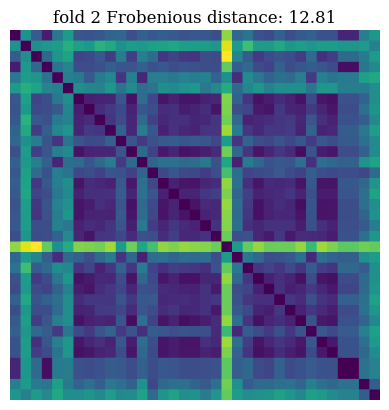

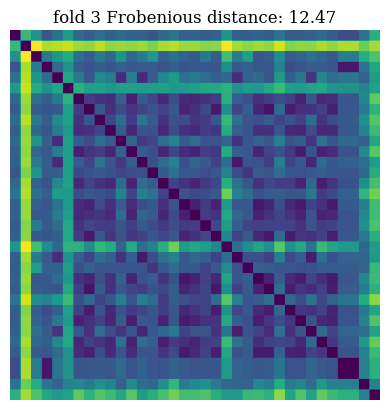

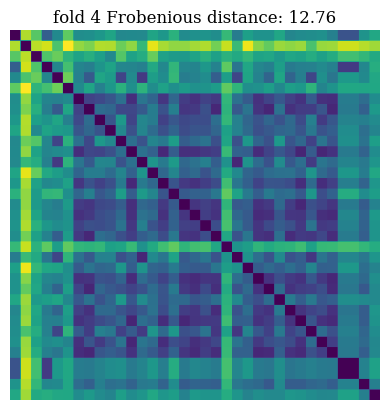

In [11]:
np.random.seed(35813)
torch.manual_seed(35813)
models = DGN.train_model(
                CONFIG["X"],
                model_params=MODEL_PARAMS,
                n_max_epochs=CONFIG["N_max_epochs"],
                n_folds=CONFIG["n_folds"],
                random_sample_size=CONFIG["random_sample_size"],
                early_stop=CONFIG["early_stop"],
                model_name=CONFIG["model_name"])